In [208]:
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt; %txt(1:n-8);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB']; addpath(JEQUILIBpath);
Cumodelspath=[rootpath,'/Cutableaus']; addpath(Cumodelspath);
% clear data and number format
clear; format short e
% turn off warnings
warning off
graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 

In [209]:
% put in constants
VT=0.05; %total volume
stockCuconc=0.0152067;

In [210]:
% put in data
data=[...
%time hr	time min	time total	cumulative  vol added	pH	mvA	delta
%1	45	105	0	2.086	75.5	1.62
%1	50	110	0	2.045	76.3	0.159999999999999
%1	55	115	0	2.04	79	0.540000000000001
%2	0	120	0	2.041	79.2	0.0400000000000006
%2	5	125	0	2.039	80.4	0.240000000000001
%2	10	130	0	2.04	82.2	0.359999999999999
%2	15	135	0	2.04	81.7	-0.1
%2	20	140	0	2.038	84	0.459999999999999
%2	25	145	0	2.037	82.9	-0.219999999999999
%2	30	150	0	2.037	83.5	0.119999999999999
%2	35	155	0	2.038	84.8	0.259999999999999
2	40	160	0	2.035	86.1	0.259999999999999
3	0	180	0	2.037	84.6	-0.075
%3	5	185	50	2.037	87.3	0.540000000000001
%3	8	188	50	2.036	91.2	1.3
%3	13	193	50	2.037	92.3	0.219999999999999
%3	18	198	50	2.032	92.8	0.1
%3	23	203	50	2.036	93.7	0.180000000000001
%3	28	208	50	2.035	93.3	-0.0800000000000011
%3	33	213	50	2.036	93.9	0.120000000000002
%3	38	218	50	2.037	95.4	0.3
%3	43	223	50	2.035	95.3	-0.0200000000000017
%3	48	228	50	2.035	96.3	0.2
%3	53	233	50	2.033	98.2	0.380000000000001
%3	58	238	50	2.036	98.2	0
4	3	243	50	2.032	98.2	0
4	8	248	50	2.034	98.6	0.0799999999999983
%4	10	250	150	2.036	100.5	0.950000000000003
%4	15	255	150	2.034	105.2	0.940000000000001
%4	20	260	150	2.036	105.6	0.0799999999999983
%4	25	265	150	2.034	107	0.280000000000001
%4	30	270	150	2.034	108	0.2
%4	35	275	150	2.032	108	0
4	40	280	150	2.032	107.8	-0.0400000000000006
4	45	285	150	2.031	107.7	-0.0199999999999989
%4	50	290	400	2.031	115	1.46
%4	55	295	400	2.031	115.9	0.180000000000001
%5	0	300	400	2.029	116.1	0.0399999999999977
5	5	305	400	2.032	116.5	0.0800000000000011
5	10	310	400	2.029	116	-0.1
%5	15	315	900	2.034	124.8	1.76
%5	20	320	900	2.037	125.3	0.1
%5	25	325	900	2.034	125.4	0.0200000000000017
5	30	330	900	2.037	125.5	0.0199999999999989
5	35	335	900	2.041	132.2	1.34
%5	40	340	1900	2.042	134	0.360000000000002
5	45	345	1900	2.042	133.5	-0.1
5	55	355	1900	2.041	134.2	0.0699999999999989
%6	0	360	3400	2.05	140.8	1.32
%6	5	365	3400	2.051	142.2	0.279999999999996
6	10	370	3400	2.05	140.8	-0.279999999999996
6	15	375	3400	2.054	142.2	0.279999999999996
];

addedCuvol=data(:,4)'*1e-6;

originalsamplemVnpH=[...
%time hr	time min	time total	cumulative  vol added	pH	mvA	delta
%0	0	0	0	5.992	49.4	
%0	5	5	0	6.002	55.7	1.26
%0	10	10	0	6.018	59.4	0.739999999999999
%0	15	15	0	6.033	62.5	0.62
%0	20	20	0	6.046	62.6	0.0200000000000003
%0	25	25	0	6.064	65.4	0.560000000000001
%0	30	30	0	6.054	73	1.52
%1	0	60	0	6.077	70.1	-0.0966666666666669
%1	5	65	0	6.042	67.4	-0.539999999999998
%1	10	70	0	6.064	69.9	0.5
%1	15	75	0	6.077	69.9	0
%1	20	80	0	6.091	68.8	-0.220000000000002
%1	25	85	0	6.019	67.3	-0.3
%1	30	90	0	6.033	67.7	0.0800000000000011
1	35	95	0	6.05	68	0.0599999999999994
1	40	100	0	6.073	67.4	-0.119999999999999
];

In [211]:
% process the data
pH=mean(originalsamplemVnpH(:,5))
mVAoriginal=mean(originalsamplemVnpH(:,6));
mVAoriginal=(originalsamplemVnpH(:,6));

mVA=data(:,6)'; Emeas=mVA; CuTmeas=1e-7; CuT=CuTmeas;
%mest=mVA(3)-mVA(2)
CuTplus=(CuTmeas*(VT)+addedCuvol*stockCuconc)./(VT+addedCuvol);

%chlorocorrecxtion
%BF1=2.49; BF2=1.14; BF3=0.9; ClT=4.9904e-4; %from Inorg. Chem. 1983. 22. 3323-3326.
%CuTplus=CuTplus./(1+BF1*ClT+BF2*ClT^2+BF3*ClT^3);

param=polyfit(log10(CuTplus(1:end)),Emeas(1:end),1)
paramlinear=polyfit(log10(CuTplus(3:end)),Emeas(3:end),1)
logCuToriginal=(Emeas(1:2)-param(2))/param(1);
CuToriginal=(10.^logCuToriginal)*63.546*1e6;
logCuoriginal=mean((mVAoriginal-param(2))/param(1));


pH = 6.0615e+00


param,1,2
1,19.2116,195.239


paramlinear,1,2
1,24.4479,214.305


In [212]:
% try one point, assume Nernst slope
m=59.2/2; Eacid=mean(Emeas(1:2)); Eorig=mean(mVAoriginal); m=paramlinear(1);
Eo=Eacid-(m)*log10(CuT);
logCuonept=(Eorig-Eo)/m

logCuonept = -6.7219e+00


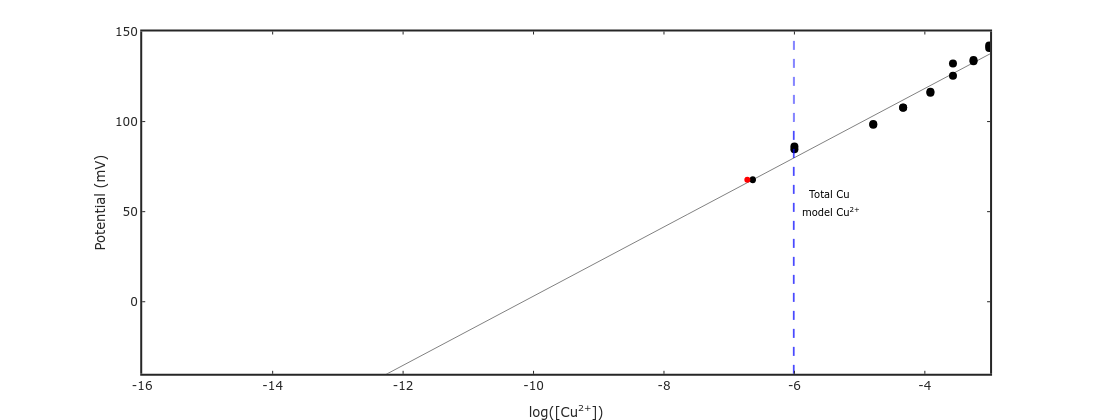

logCunosolid = -6.0153e+00


logCuoriginalsample = -6.6386e+00


logCuonept = -6.7219e+00


In [213]:
% MODEL FOR COMPARISON

%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry

flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
database=[]; 
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=0; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

CuT=CuTmeas; inorganicTOTALS=[CuT];
inorganicTOTALS(inorganicTOTALS==0)=1e-16; % get rid of zero values, b/c div by zero error
TOTALS=[inorganicTOTALS]; %TOTALS=inorganicTOTALS;
pe=20.75-pH; PCO2=10^-3.5;
[Cuall,CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2opentableauallsolids(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);
[CuwithCuOs,CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2opentableauCuOs(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);
[Cunosolid,CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2opentableaunosolid(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);

plot(log10(CuTplus),Emeas,'ko','markersize',8)

hold on
plot([logCuoriginal'],[mVAoriginal'],'ko')
logCuplot=-13:0.1:-3; Eplot=polyval(param,logCuplot);
plot(logCuplot,Eplot,'k-')
set(gca,'linewidth',2)
xlabel('log[Cu^{2+}]'); ylabel('E (mV)')
hold on

plot([log10(Cuall) log10(Cuall)],[-100 100],'b--')
plot([log10(Cunosolid) log10(Cunosolid)],[-100 150],'b--'); hold on
plot([log10(CuT) log10(CuT)],[-100 150],'b--')
%plot([-9.576 -9.576],[-100 100],'b--')

text(log10(Cunosolid)+0.1,50,'model Cu^{2+}','rotation',90)
text(log10(CuT)+0.2,60,'Total Cu','rotation',90)


xlabel('log([Cu^{2+}])')
ylabel('Potential (mV)')
set(gca,'LineWidth',2,'fontsize',12)

logCunosolid=log10(Cunosolid)
logCuoriginalsample=mean((mVAoriginal-param(2))/param(1))
logCuonept

axis([-16 -3 -40 150])

plot(logCuonept,Eorig,'ro','markerfacecolor','r')
